<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/Heart_failure_prediction_using_Auto_Sklearn_%F0%9F%A9%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

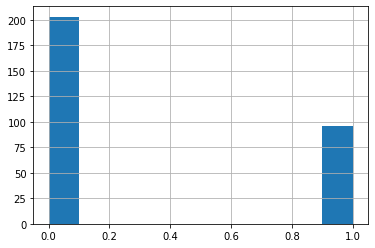

In [7]:
df['DEATH_EVENT'].hist()

In [8]:
from sklearn.utils import resample

safe = df[df["DEATH_EVENT"] == 0]
unsafe = df[df["DEATH_EVENT"] == 1]

In [9]:
safe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


In [10]:
upsampled = resample(unsafe,
                          replace=True, 
                          n_samples=len(safe), 
                          random_state=33) 

In [11]:

upsampled = pd.concat([safe, upsampled])

# check new class counts
upsampled["DEATH_EVENT"].value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

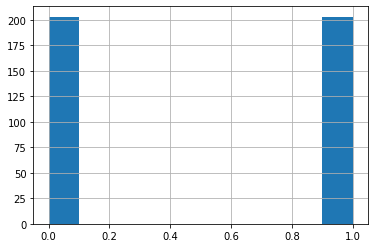

In [12]:
upsampled['DEATH_EVENT'].hist()

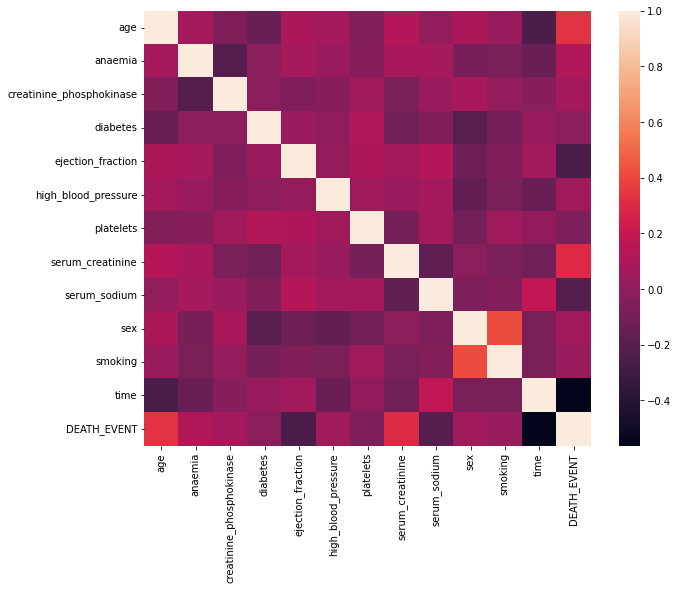

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(upsampled.corr())

In [14]:
X = upsampled.drop(["DEATH_EVENT"],axis=1)
y = upsampled["DEATH_EVENT"]

In [15]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [16]:
print(f'X Training Shape:',X_train.shape)
print(f'y Training Shape:',y_train.shape)
print('***************************')
print(f'X Testing Shape y:',X_test.shape)
print(f'y Testing Shape y:',y_test.shape)

X Training Shape: (324, 12)
y Training Shape: (324,)
***************************
X Testing Shape y: (82, 12)
y Testing Shape y: (82,)


In [19]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,217 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpackin

In [21]:
import sklearn

In [1]:
import autosklearn.classification as classifier

In [17]:
clf = classifier.AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
clf.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_size=1,
                      initial_configurations_via_metalearning=0,
                      per_run_time_limit=9, time_left_for_this_task=300)

In [18]:
clf.score(X_train, y_train)

0.9845679012345679

In [19]:
clf.score(X_test, y_test)

0.8658536585365854

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

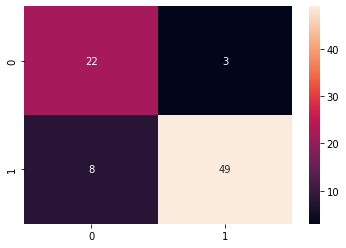

In [21]:

conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [22]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [23]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)

In [24]:
print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

Accuracy    : 0.8658536585365854
Precision   : 0.9423076923076923
Recall      : 0.8596491228070176
F1 score    : 0.8990825688073394
